# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset ini digunakan untuk mendeteksi kemungkinan penyakit kanker paru
berdasarkan 15 gejala yang dilaporkan pasien.
Label target: LUNG_CANCER (YES / NO)

Sumber dataset: https://www.kaggle.com/datasets/akashnath29/lung-cancer-dataset
Jumlah data: 3000 baris, 16 kolom
Fitur utama: GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY, ..., CHEST_PAIN


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [27]:
df = pd.read_csv("lung cancer dataset.csv")

print("Ukuran data:", df.shape)
df.head()

Ukuran data: (3000, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [28]:
print("\nInformasi Data:")
print(df.info())


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG

In [29]:


print("\nStatistik Deskriptif:")
print(df.describe(include='all'))


Statistik Deskriptif:
       GENDER          AGE      SMOKING  YELLOW_FINGERS      ANXIETY  \
count    3000  3000.000000  3000.000000     3000.000000  3000.000000   
unique      2          NaN          NaN             NaN          NaN   
top         M          NaN          NaN             NaN          NaN   
freq     1514          NaN          NaN             NaN          NaN   
mean      NaN    55.169000     1.491000        1.514000     1.494000   
std       NaN    14.723746     0.500002        0.499887     0.500047   
min       NaN    30.000000     1.000000        1.000000     1.000000   
25%       NaN    42.000000     1.000000        1.000000     1.000000   
50%       NaN    55.000000     1.000000        2.000000     1.000000   
75%       NaN    68.000000     2.000000        2.000000     2.000000   
max       NaN    80.000000     2.000000        2.000000     2.000000   

        PEER_PRESSURE  CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count     3000.000000      3000

In [30]:


print("\nJumlah nilai null tiap kolom:")
print(df.isnull().sum())


Jumlah nilai null tiap kolom:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


In [31]:
print("\nJumlah duplikat:", df.duplicated().sum())


Jumlah duplikat: 2


/tmp/ipython-input-1257058982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LUNG_CANCER', data=df, palette='coolwarm')


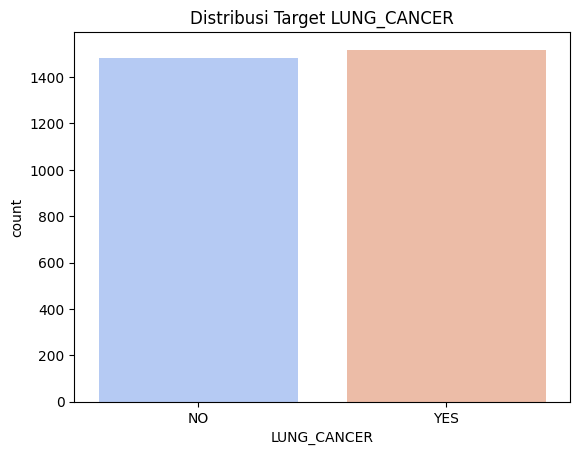

In [32]:


# Visualisasi distribusi target
sns.countplot(x='LUNG_CANCER', data=df, palette='coolwarm')
plt.title("Distribusi Target LUNG_CANCER")
plt.show()


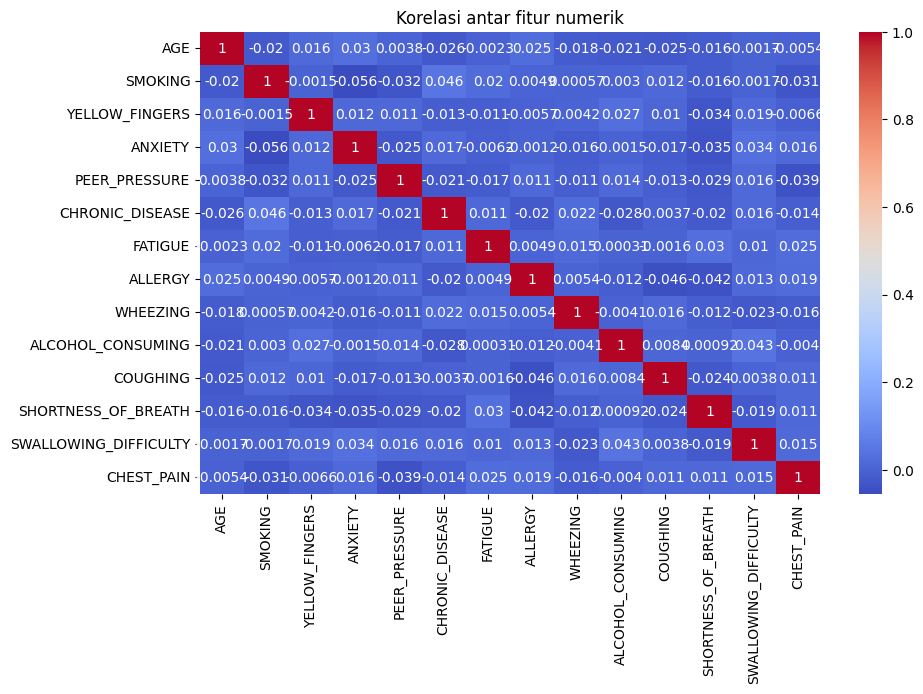

In [33]:

# Korelasi antar fitur numerik
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## a. Menghapus duplikat

In [34]:

df = df.drop_duplicates()
print("Setelah hapus duplikat:", df.shape)

Setelah hapus duplikat: (2998, 16)




## b. Menangani data kategorikal
## Encode kolom 'GENDER' dan 'LUNG_CANCER'

In [35]:

le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])  # M=1, F=0
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])  # YES=1, NO=0



## c. Normalisasi kolom numerik

In [36]:

num_cols = [col for col in df.columns if col not in ['LUNG_CANCER']]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])



## d. Split data (train-test)

In [37]:

X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## e. Simpan hasil preprocessing

In [38]:

processed_df = pd.concat([X, y], axis=1)
processed_df.to_csv("lung_cancer_preprocessed.csv", index=False)
print("✅ Dataset hasil preprocessing disimpan sebagai lung_cancer_preprocessed.csv")


✅ Dataset hasil preprocessing disimpan sebagai lung_cancer_preprocessed.csv
